In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pws_library import get_data, cointegration_test
import statsmodels.tsa.stattools as ts
import seaborn as sn

In [2]:
df = pd.DataFrame()
tickers = ['NQ', 'ES', 'YM']
for ticker in tickers:
    df1 = pd.read_csv(f"C:\\Users\\Bram\\Desktop\\profielwerkstuk\\data\\{ticker}.csv")
    df1['date'] = pd.to_datetime(df1['date'])
    df1 = df1.set_index('date')
    df[f"{ticker}"] = df1['close']

In [3]:
df = df.dropna()
df.tail()

,NQ,ES,YM
date,,,
2017-09-20,5978.50,2505.25,22376.0
2017-09-21,5945.25,2501.00,22333.0
2017-09-22,5935.75,2499.50,22299.0
2017-09-25,5876.50,2497.00,22276.0
2017-09-26,5892.50,2495.50,22259.0


In [35]:
df2 = get_data(['NDX', '^GSPC', 'DJI'], start ="2003-01-01", end='2008-01-01' )

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [36]:
df = pd.concat([df, df2], axis=1)

In [37]:
df = df.dropna()
df.head()

,NQ,ES,YM,NDX,^GSPC,DJI
2003-01-02 00:00:00,1025.0,907.50,8591.0,1027.859985,909.030029,8607.519531
2003-01-03 00:00:00,1036.0,910.00,8604.0,1031.630005,908.590027,8601.690430
2003-01-06 00:00:00,1061.0,926.50,8737.0,1061.479980,929.010010,8773.570312
2003-01-07 00:00:00,1075.0,923.75,8750.0,1071.849976,922.929993,8740.589844
2003-01-08 00:00:00,1045.0,910.00,8583.0,1042.520020,909.929993,8595.309570


<AxesSubplot:>

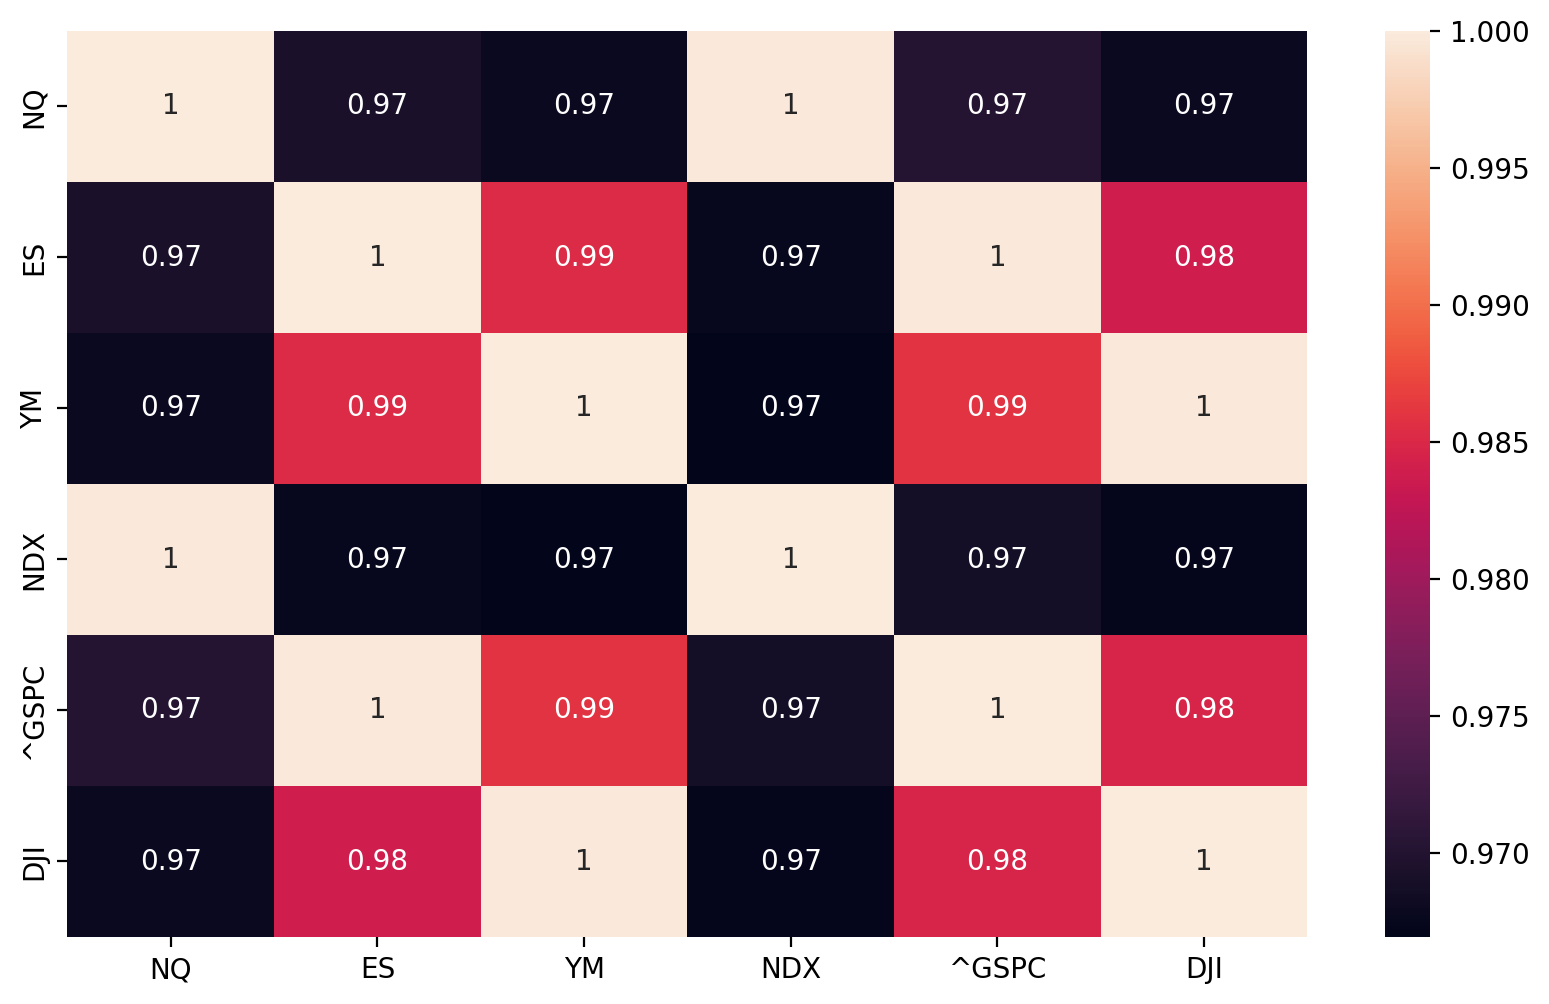

In [38]:
corr = df.corr()
plt.figure(figsize=(10,6), dpi=200)
sn.heatmap(corr, annot=True)

<AxesSubplot:>

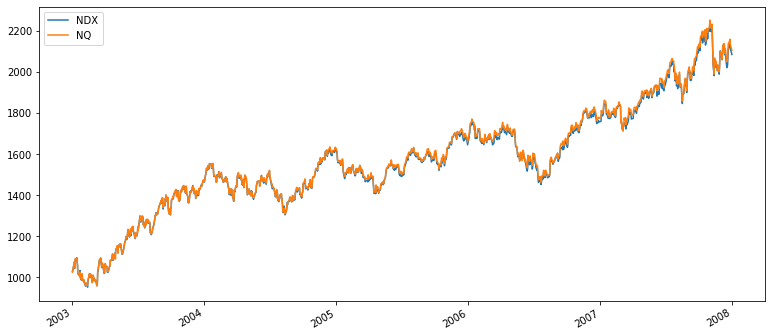

In [40]:
df[['NDX', 'NQ']].plot(figsize=(13,6))

In [48]:
df3 = pd.DataFrame()
df3['ndxnqspread'] = df['NDX'] - df['NQ']
df3['spesspread'] = df['^GSPC'] - df['ES']
df3['djiymspread'] = df['DJI'] - df['YM']
df3.head()

,ndxnqspread,spesspread,djiymspread
2003-01-02,2.859985,1.530029,16.519531
2003-01-03,-4.369995,-1.409973,-2.309570
2003-01-06,0.479980,2.510010,36.570312
2003-01-07,-3.150024,-0.820007,-9.410156
2003-01-08,-2.479980,-0.070007,12.309570


<AxesSubplot:>

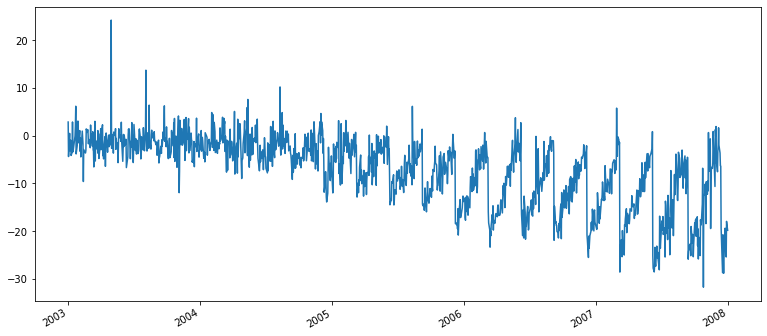

In [49]:
df3['ndxnqspread'].plot(figsize=(13,6))

In [46]:
adf = ts.adfuller(df3['ndxnqspread'])
print(adf)

(-5.168311595821352, 1.0200768112865451e-05, 3, 1254, {'1%': -3.4355754676859886, '5%': -2.8638475772391665, '10%': -2.5679985805677017}, 6834.806037918953)


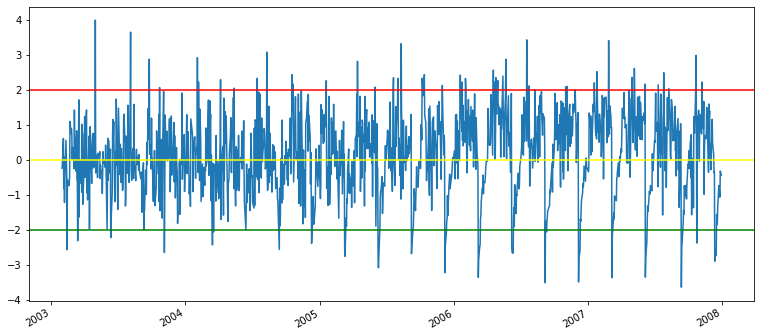

In [57]:
df3['ndxnqzscore'] = (df3['ndxnqspread'] - df3['ndxnqspread'].rolling(20).mean())/df3['ndxnqspread'].rolling(20).std()
df3['ndxnqzscore'].plot(figsize=(13,6))
plt.axhline(0, c='yellow')
plt.axhline(-2, c='green')
plt.axhline(2, c='red')


<AxesSubplot:>

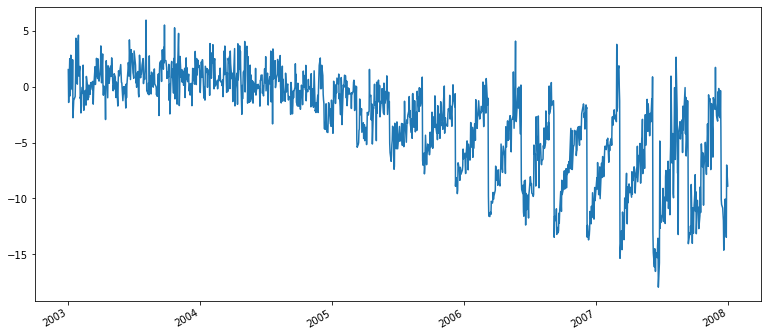

In [50]:
df3['spesspread'].plot(figsize=(13,6))

In [52]:
adf1= ts.adfuller(df3['spesspread'])
print(adf1)

(-4.752482029049627, 6.698868156929788e-05, 3, 1254, {'1%': -3.4355754676859886, '5%': -2.8638475772391665, '10%': -2.5679985805677017}, 5164.913002839901)


<AxesSubplot:>

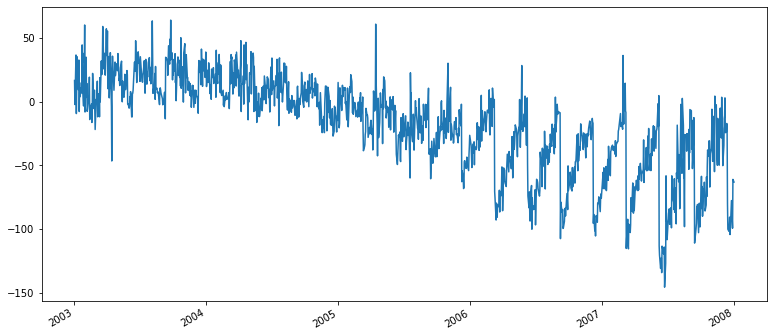

In [53]:
df3['djiymspread'].plot(figsize=(13,6))

In [54]:
adf2= ts.adfuller(df3['djiymspread'])
print(adf2)

(-4.336511029141496, 0.000383803587178245, 3, 1254, {'1%': -3.4355754676859886, '5%': -2.8638475772391665, '10%': -2.5679985805677017}, 10385.4279596378)
